In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.stats as sps
from scipy.special import ndtr

#### 1) Сгенерировать $\theta \in \mathcal{U}(-10, 10)$

In [3]:
teta = np.random.uniform(-10, 10)
n=1000
N=10000
teta

-5.301828154869055

#### 2) Сгенерировать выборку $X_{1}, ..., X_{1000} \sim \mathcal N(\theta, 1)$

#### $$\mathcal p_{\theta}(x) = \frac{e^{- \frac{(x-\theta)^{2}}{2}}}{\sqrt{2\pi}}$$

In [4]:
X = sps.norm.rvs(loc=teta, scale=1, size=n, random_state = 42)
X

array([-4.805114  , -5.44009246, -4.65413962, -3.7787983 , -5.53598153,
       -5.53596511, -3.72261534, -4.53439343, -5.77130254, -4.75926811,
       -5.76524585, -5.76755791, -5.05986588, -7.2151084 , -7.02674599,
       -5.86411568, -6.31465928, -4.98758082, -6.20985223, -6.71413186,
       -3.83617939, -5.52760446, -5.23429995, -6.72657634, -5.84621088,
       -5.19090557, -6.45282173, -4.92613014, -5.90246684, -5.5935219 ,
       -5.90353477, -3.44954997, -5.31532538, -6.35953908, -4.47928324,
       -6.5226718 , -5.09296456, -7.26149828, -6.6300142 , -5.10496692,
       -4.56336157, -5.13045987, -5.41747644, -5.60293185, -6.78035015,
       -6.02167236, -5.76246693, -4.24470593, -4.95820987, -7.06486831,
       -4.97774419, -5.68691044, -5.97875016, -4.69015187, -4.27082863,
       -4.37054804, -6.14104568, -5.61104053, -4.97056472, -4.32628303,
       -5.78100239, -5.48748713, -6.40816313, -6.49803478, -4.48930233,
       -3.94558813, -5.37383828, -4.29829526, -4.94019213, -5.94

#### 3) Найти выборочную медиану $\hat \theta$ и выборочное среднее $\overline{X}$

In [5]:
medX = np.median(X)
meanX = np.mean(X)
medX, meanX

(-5.276527542634167, -5.28249609904673)

#### 4) Проделать 2-3 еще 100 раз получив набор из 101 значения выборочной медианы и 101 значения выборочного среднего

In [6]:
X = np.array([sps.norm.rvs(loc=teta, scale=1, size=n) for _ in range (N+1)])
medX = np.median(X, axis = 1) 
meanX = np.mean(X, axis = 1)
medX, meanX
None

#### 5-6) Построить гистограммe по 101 полученному значению величины $\hat \theta$ и $\overline{X}$   и провести вертикальную линию соответствующую значению $\theta$

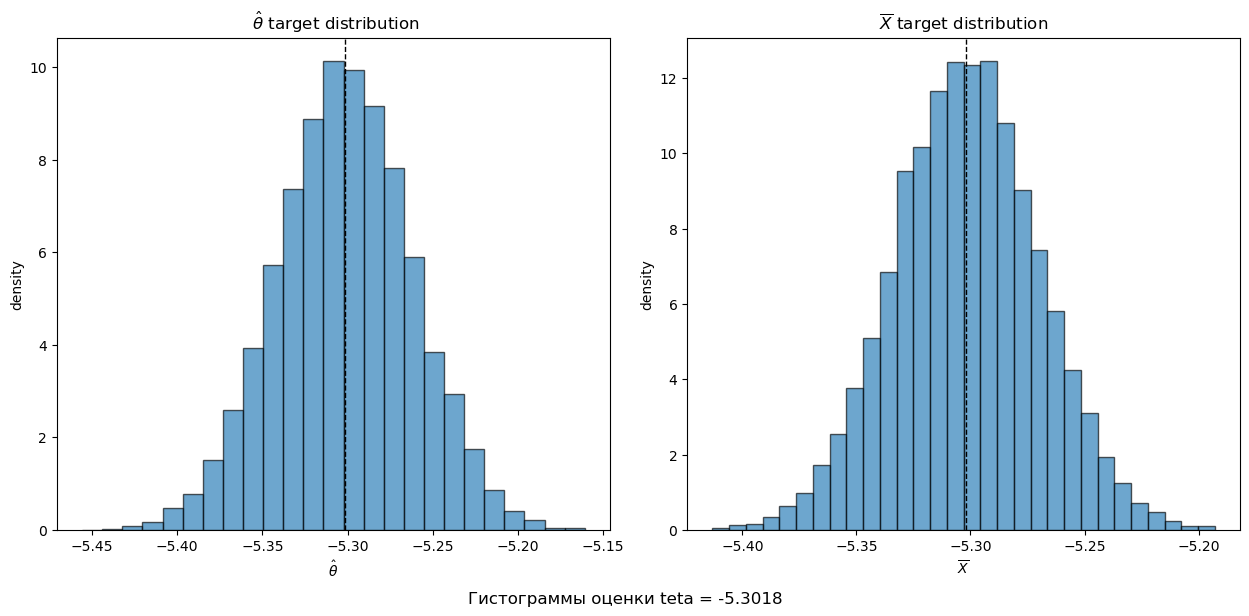

In [7]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7))

ax0.hist(medX, bins = 25, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
ax0.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax0.set_ylabel('density')
ax0.set_xlabel(r'$\hat \theta$')
ax0.set_title(r' $\hat \theta$ target distribution')
# min_ylim, max_ylim = ax1.ylim()
# ax0.text(teta, 10*0.9, 'teta: {:.2f}'.format(teta))

ax1.hist(meanX, bins = 30, edgecolor='black', density=True, alpha =0.65)
ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\overline{X}$')
ax1.set_title(r'$\overline{X}$ target distribution')

f.suptitle('Гистограммы оценки teta = {:.4f}'.format(teta), y=0.055)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

#### 7) Сделать выводы, о том какая оценка статистика лучше оценивает параметр $\theta$

* $\overline X$ лучше

#### 8) Повторите 1-7 еще 2 раза

Перезапусти клетки еще 2 раза

#### 9) Привести теоретическое объяснение результатов, полученных в ходе численного эксперимента

* $\theta$ = mod of $\mathcal N$($\theta$, 1) = EX, $\hat \theta \overset{п.н}{\to} \theta$
* $\overline X \overset{п.н}{\to} EX = \theta$

#### 10.1) Является ли $\hat\theta$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.

*  $\theta$ = mod of $\mathcal N$($\theta$, 1) = EX, $\hat \theta \overset{п.н}{\to} \theta$, Да, является

####  11.1)Является ли $\hat \theta$ ассимтотически нормальной?. Получить ответ аналитически.Подтвердить аналитические расчеты с помощь построения вспомогательной гистограммы по 101 значению величины $\sqrt{n}(\hat\theta -\theta)$

* Да, является видно из гистограммы

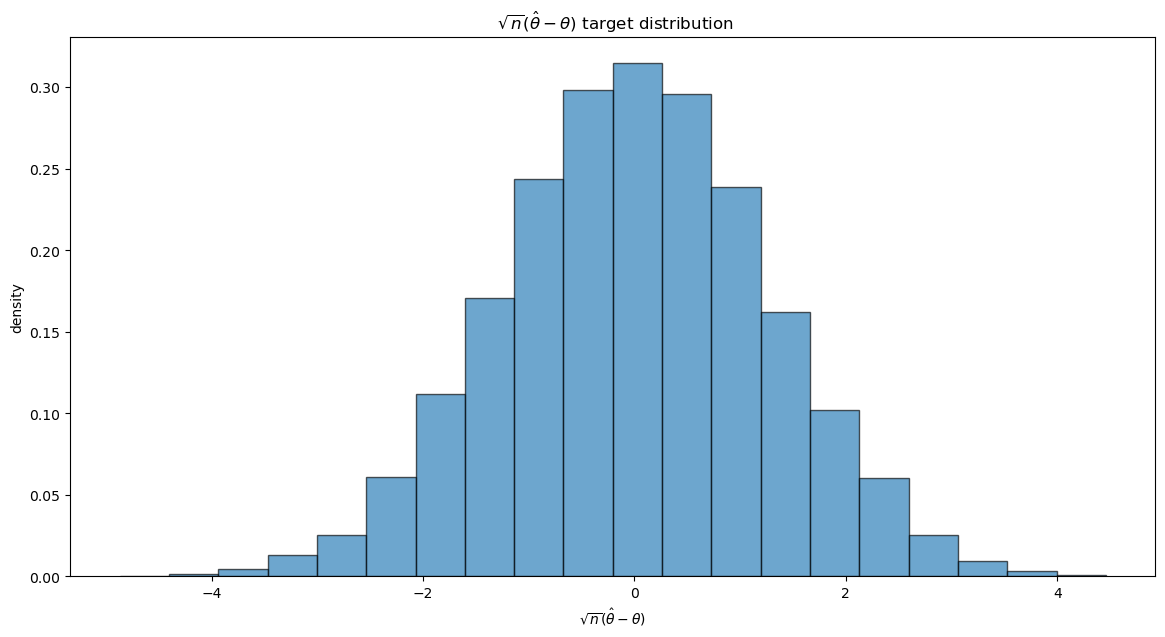

In [10]:
scaledMedX = np.sqrt(n)*(medX-teta)
f, (ax1) = plt.subplots(1, 1, figsize=(14,7))
ax1.hist(scaledMedX, bins = 20, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
# ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\sqrt{n}(\hat\theta -\theta)$')
ax1.set_title(r' $\sqrt{n}(\hat\theta -\theta)$ target distribution')
None

In [13]:
np.var(scaledMedX)

1.577210706345121

#### 10.2)  Является ли $\overline{X}$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.

* Да, является, видно из гистограммы + ЗБЧ

####  11.2)Является ли $\overline{X}$ ассимтотически нормальной?. Получить ответ аналитически.Подтвердить аналитические расчеты с помощь построения вспомогательной гистограммы по 101 значению величины $\sqrt{n}(\overline{X} -\theta)$

* Да, является по цпт посчитайте

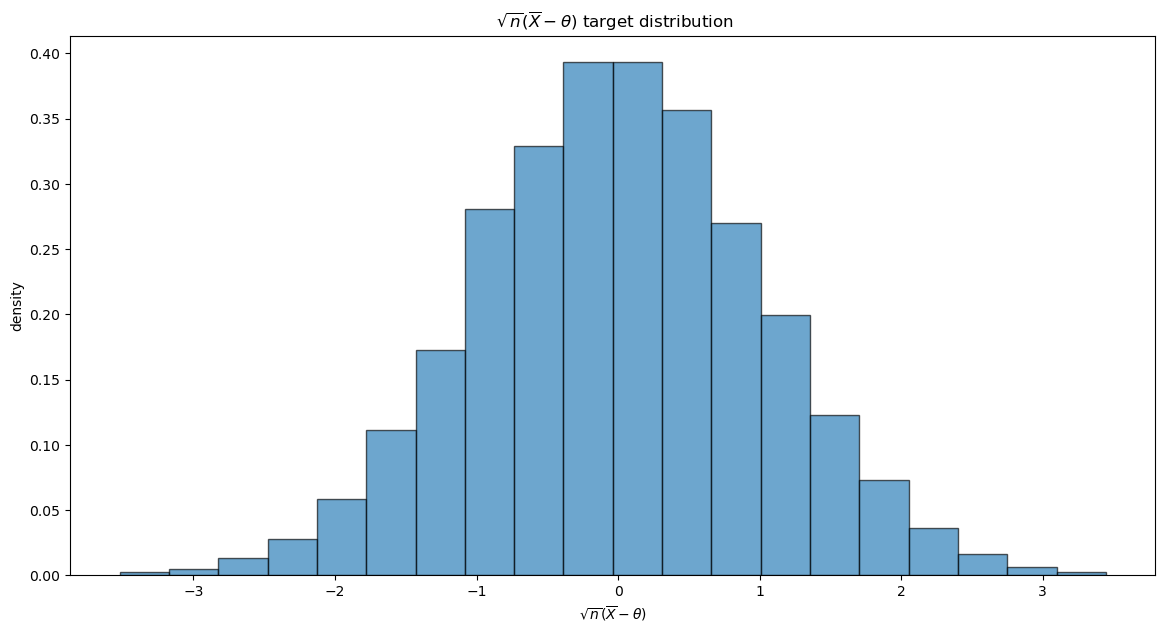

In [9]:
scaledMeanX = np.sqrt(n)*(meanX-teta)
f, (ax1) = plt.subplots(1, 1, figsize=(14,7))
ax1.hist(scaledMeanX, bins = 20, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
# ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\sqrt{n}(\overline{X} -\theta)$')
ax1.set_title(r' $\sqrt{n}(\overline{X} -\theta)$ target distribution')
None

In [12]:
np.var(scaledMeanX)

1.0083392122913652